<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-118/blob/main/Curso02_Modulo05_A01793006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATOS GENERALES**

Alumna: Diana Valeria Garcia Briones

Matricula: A01793006

Modulo 05 - IBM



---




**Resultados de Progreso y Resultado de Examen**

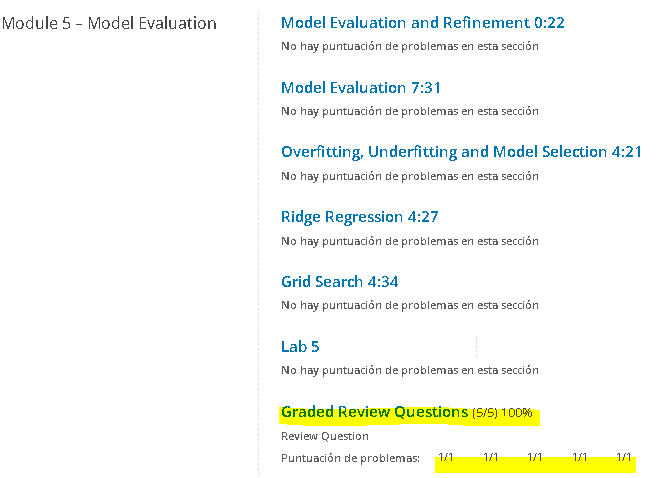

#Evaluacion de Modelos & Refinamiento

La evaluacion de un modelo para determinar si realizará un buen trabajo de predicción para nuevos y futuros datos de destino. 

Dado que las futuras instancias tienen valores de destino desconocidos, debe comprobar la métrica de precisión del modelo de ML en relación con los datos de los que ya sabe la respuesta de destino y utilizar esta comprobación como proxy de precisión predictiva para futuros datos.

In [17]:
#Importanción de Librerias
import pandas as pd
import numpy as np
import requests

In [31]:
#Almacenar archivo de forma local

filename=("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv")

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        print(response.content)
        with open(filename, "wb") as f:
            f.write(response.content)

Downloads = download(filename, "module_5_auto.csv") 

b',Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas\n0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1\n1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,0.8902777777777777,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1\n2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,0.9097222222222222,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1\n3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,0.9194444444444444,54.3,2

In [32]:
df = pd.read_csv(filename)
df.head() #Impresion de datos

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


(0.0, 47414.1)

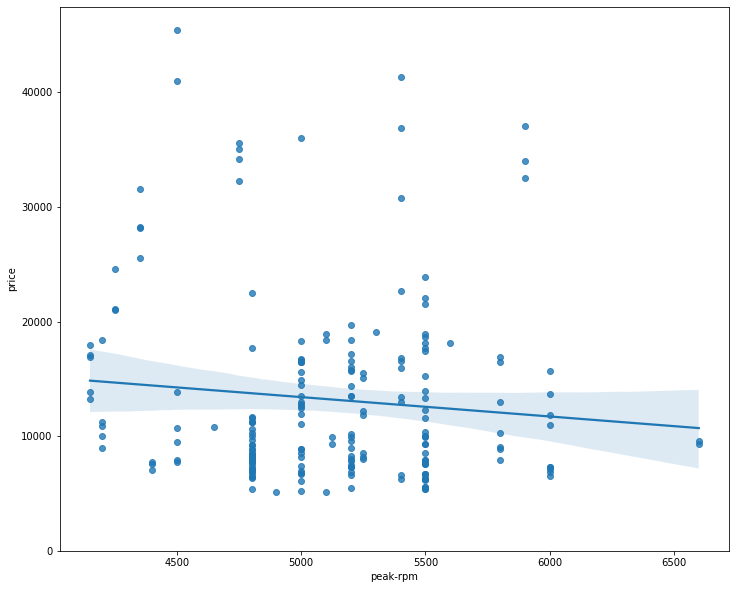

In [56]:
#Creacion del Grafico para peak-rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [21]:
#Almacenamiento de los datos numericos
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [22]:
#Librerias para construir Visualizaciones
from ipywidgets import interact, interactive, fixed, interact_manual

#Funciones para graficar

Se definen las funciones que seran utilizadas para graficar:

In [29]:
#Graficacion del Dataframe
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

(0.0, 48178.42725898421)

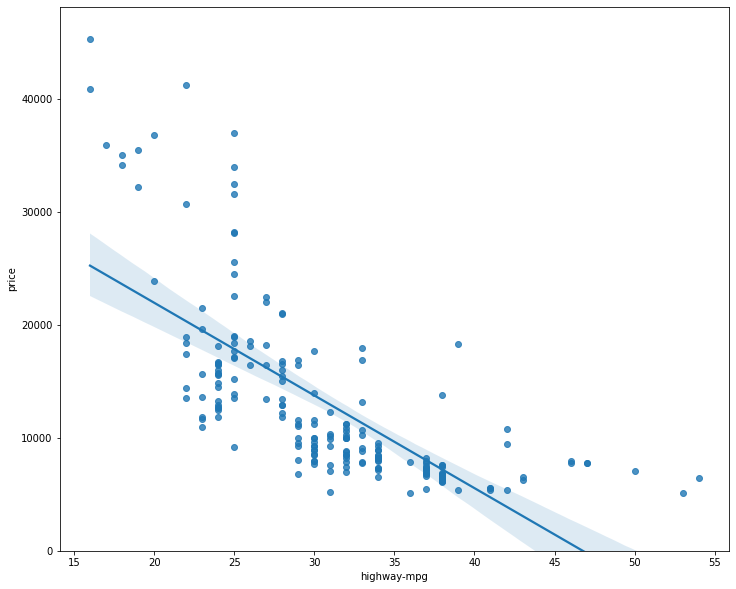

In [55]:
#Creacion del Grafico para highway-gp
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [30]:
#Test de la Funcion de Distribucion
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    #lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

*En scikit-learn, un FIT es un objeto que se ajusta a un modelo basado en los datos de entrada*

#Entrenamiento y Testing

Un paso importante para probar su modelo es dividir sus datos en datos de entrenamiento y prueba. Colocaremos el precio objetivo de los datos en un marco de datos separado y_data:

In [34]:
#Se almacena la informacion de precios en la variable Y
y_data = df['price']

#Eliminamos la caracteristica en X
x_data=df.drop('price',axis=1)

#Dividimos la informacion de datos de manera aletoria
from sklearn.model_selection import train_test_split #Modulo para hacer el split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Numero de registros para prueba :", x_test.shape[0])
print("Numero de registros para Entrenamiento :",x_train.shape[0])


Numero de registros para prueba : 21
Numero de registros para Entrenamiento : 180


#Pregunta 1:

Utilice la función "train_test_split" para dividir el conjunto de datos de modo que el 40% de las muestras de datos se utilicen para la prueba. Establezca el parámetro "random_state" igual a cero. La salida de la función debe ser la siguiente: "x_train1", "x_test1", "y_train1" y "y_test1".

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("Numero de registros para prueba:", x_test1.shape[0])
print("Numero de registro para entrenamiento:",x_train1.shape[0])

Numero de registros para prueba: 81
Numero de registro para entrenamiento: 120


In [37]:
#Se importa el metodo para realizar una regresion Lineal
from sklearn.linear_model import LinearRegression
lre=LinearRegression() #almacenamos el metodo en una variable

lre.fit(x_train[['horsepower']], y_train) #hacemos fit utilizanndo la caracteristica de caballos de fuerza
lre.score(x_test[['horsepower']], y_test) #Calculo de R2

lre.score(x_train[['horsepower']], y_train) #Se mide la eficiencia del modelo

0.6619724197515104

#Pregunta 2:

Encuentre el R^2 en los datos de prueba usando el 40 % del conjunto de datos para la prueba.

In [39]:
#Split del conjunto para datos de entrenamiento y prueba

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

**Validacion Cruzada**

La validación cruzada es una técnica para evaluar modelos de ML mediante el entrenamiento de varios modelos de ML en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos.

In [40]:
from sklearn.model_selection import cross_val_score #Importamos el modelo

In [42]:
#Entrenamineto del modelo
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

#Resultado del modelo
Rcross

print("La media del modelo es:", Rcross.mean(), "La desviacion estandar es:" , Rcross.std())

La media del modelo es: 0.522009915042119 La desviacion estandar es: 0.291183944475603


Podemos usar el error cuadrático negativo como puntaje configurando la métrica del parámetro 'puntuación' en 'neg_mean_squared_error'

In [44]:
#Validacion Cruzada usando la media negativa del error
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

#Pregunta 3

Calcule el R ^ 2 promedio usando dos folds, luego encuentre el R ^ 2 promedio para el segundo pliegue utilizando la función "caballos de fuerza":


In [45]:
#Codigo de Validacion para 2 folds
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

**Prediccion de utilizando Validacion Cruzada**

Se puede usar la función 'cross_val_predict' para predecir la salida. La función divide los datos en el número especificado de folds, con un fold para prueba y los otros fold se usan para entrenamiento. Primero, importa la función:

In [46]:
#Importamos el modelo
from sklearn.model_selection import cross_val_predict

#Fit del modelo para predecir el valor de y utilizando los caballos de poder
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#Overfitting, Underfitting y Selección de Modelo

Los datos de prueba, a veces denominados "datos fuera de muestra", son una medida de mejor resultado y prueba que tan bien funciona el modelo en el mundo real. 

Un mal modelo en el mundo real puede ser resultado de un sobreajuste, donde el modelo memorizo el patron de los datos.

In [47]:
#Modelo de Regresion Lineal
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [48]:
#Prediccion utilizando los datos de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [49]:
#Prediccion utilizando los datos de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [50]:
#Evaluaciones utilizando los datos de entrenamiento y de prueba
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


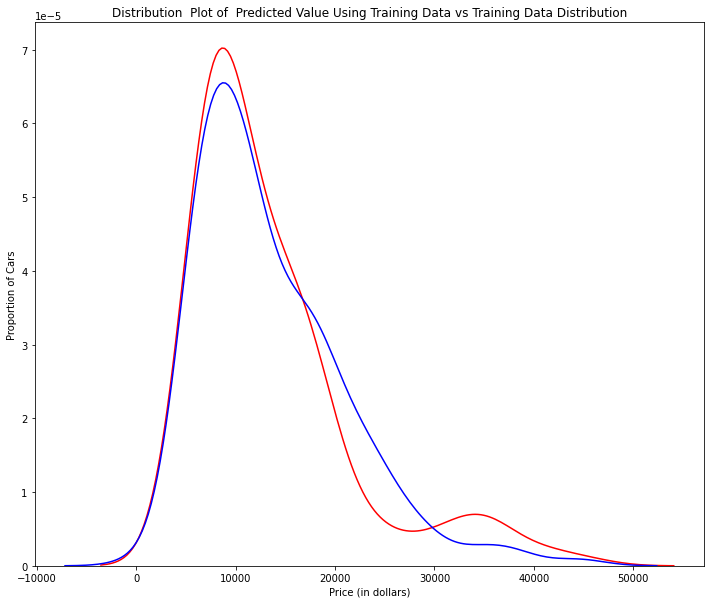

In [52]:
#Examinacion de los resultados del modelo
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. Pero, ¿que sucede cuando el modelo encuentra nuevos datos del conjunto de datos de prueba? Cuando el modelo genera nuevos valores a partir de los datos de prueba, vemos que la distribucion de los valores predichos es muy diferente de los valores objetivo reales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


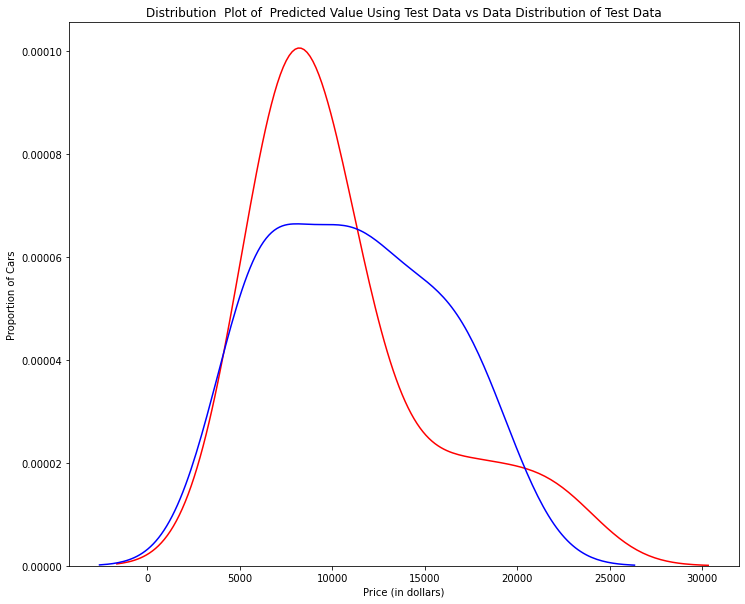

In [53]:
#Ejecucion utilizando los datos de prueba
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparando la Figura 1 y la Figura 2, es evidente que la distribución de los datos de prueba en la Figura 1 es mucho mejor para ajustar los datos. Esta diferencia en la Figura 2 es evidente en el rango de 5000 a 15,000. Aqui es donde la forma de la distribución es extremadamente diferente. Veamos si la regresión polinomial también muestra una caída en la precisión de la predicción al analizar el conjunto de datos de prueba.Comparando la Figura 1 y la Figura 2, es evidente que la distribución de los datos de prueba en la Figura 1 es mucho mejor para ajustar los datos. Esta diferencia en la Figura 2 es evidente en el rango de 5000 a 15,000. Aquí es donde la forma de la distribución es extremadamente diferente. Veamos si la regresión polinomial también muestra una caída en la precisión de la predicción al analizar el conjunto de datos de prueba.

#Overfitting

El sobreajuste ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar su modelo con el conjunto de prueba, su modelo no funciona tan bien ya que está modelando ruido, no el proceso subyacente que generó la relación. Vamos a crear un modelo polinomial de grado 5.


In [59]:
#Split de datos
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [65]:
#Construccion del Modelo
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=5)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [66]:
#Test del modelo
print("Valores Predichos:", yhat[0:4])
print("Valores Reales:", y_test[0:4].values)

Valores Predichos: [14141.63807508 14141.63807508 20814.29423473 12745.03562306]
Valores Reales: [ 6295. 10698. 13860. 13499.]


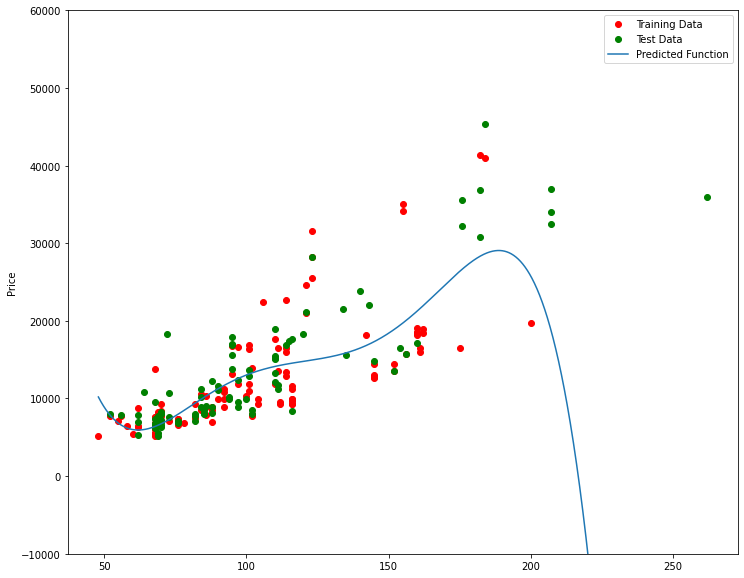

In [67]:
#Visualizacion de Resultados
yhat = poly.predict(x_test_pr)
yhat[0:5]
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Un modelo de regresión polinomial donde los puntos rojos representan datos de entrenamiento, los puntos verdes representan datos de prueba y la línea azul representa la predicción del modelo.

In [69]:
#R2
poly.score(x_train_pr, y_train)
poly.score(x_test_pr, y_test)


-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

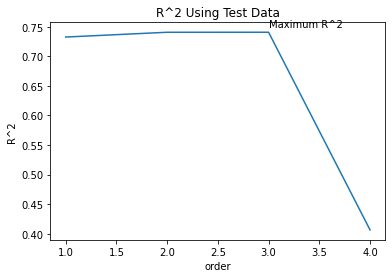

In [71]:
#Visualizacion de la R cuadratica del modelo
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos que R ^ 2 aumenta gradualmente hasta que se usa un polinomio de orden tres. Luego, el R ^ 2 disminuye drásticamente en un polinomio de orden cuatro.

In [72]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [73]:
#Test del modelo polinomial utilizando diferentes conjuntos
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

#Evaluacion de los Modelos usando Visualizaciones



In [54]:
#Importacion de Librerias
import seaborn as sns
%matplotlib inline 

**Grafico de Regresion**

Es utilizado comunmente para visualizar modelos de regresion. Muestra combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. 

Esto nos permite una estimacion razonable de la relacion entre las dos variables, la fuerza de la correlacion, así como la dirección (correlación positiva o negativa).

Comparando los graficos de "rpm" vs "mpg", vemos que los puntos para "mpg" estan mucho mas cerca de la linea.

Los puntos de "rpm" estan mas dispersos alrededor de la linea predicha y es mucho mas dificil determinar si los puntos disminuyen o aumentan.

**Grafico de Residuos**

Residuo: La diferencia entre el valor observado (y) y el valor predicho.

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

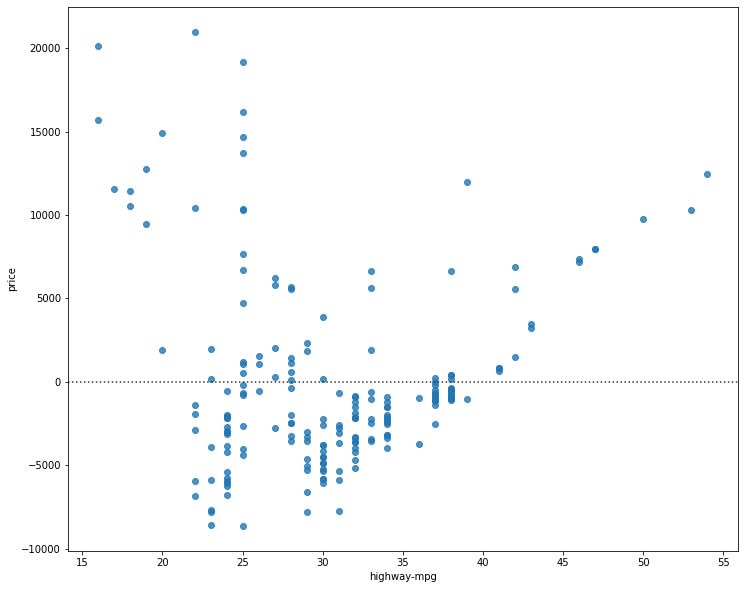

In [57]:
#Grafico de Residuos
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

En la grafica los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.